+ Our gauge potential is given by: $  A_{\lambda}^{nm}= -i \hbar \dfrac{\partial_{\lambda}H^{nm}}{\omega_{nm}^2 + \mu^2} \omega_{nm}$
+ For non-zero $\mu$, gauge potential is an approximate one.

In [1]:
from quspin.operators import hamiltonian # Hamiltonians and operators
from quspin.basis import spin_basis_1d # Hilbert space spin basis
import numpy as np # generic math functions
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
def Ham_nonint(L):
    basis = spin_basis_1d(L)
    hz=(np.sqrt(5)+1)/4 #parameters used by Kim and Huse
    hx=(np.sqrt(5)+5)/8
    J=1.0
    hz_arr = [[hz,i] for i in range(L)] 
    hx_arr = [[hx,i] for i in range(L)] 
    J_arr = [[1,i,(i+1)] for i in range(L-1)] # OBC [[J,i,(i+1)%L] for i in range(L)] # PBC
    
    # static and dynamic lists
    static = [["xx",J_arr],["z",hz_arr], ["x",hx_arr] ]
    dynamic =[]
    H = hamiltonian(static,dynamic,basis=basis,dtype=np.complex_,check_symm=False,check_herm=False)
    return H

def Ham_int(L):
    basis = spin_basis_1d(L)
    hz=-5#(np.sqrt(5)+1)/4 #parameters used by Kim and Huse
    J=-1.0
    hz_arr = [[hz,i] for i in range(L)] # OBC
    J_arr = [[1,i,(i+1)] for i in range(L-1)] # OBC [[J,i,(i+1)%L] for i in range(L)] # PBC
    
    # static and dynamic lists
    static = [["xx",J_arr],["z",hz_arr]]
    dynamic =[]
    H = hamiltonian(static,dynamic,basis=basis,dtype=np.complex_,check_symm=False,check_herm=False)
    return H

def del_lambda_Ham(L):
    basis = spin_basis_1d(L)  
    hx_lamb=-1.0
    hx_lamb_arr=np.zeros(L)
    hx_lamb_arr[0]=hx_lamb
    hx_lamb_arr = [[hx_lamb_arr[i],i] for i in range(L)] # OBC
    static_lamb = [["z",hx_lamb_arr]]
    dynamic_lamb =[]
    op_lamb=hamiltonian(static_lamb,dynamic_lamb,basis=basis,dtype=np.complex_,check_symm=False,check_herm=False)
    return op_lamb

def norm(A_lamb):    
    return np.linalg.norm(A_lamb, 'fro')

In [3]:
def guage_potent_mu(Ham,L, mu):
    E,V= Ham.eigh()
    op_lamb= del_lambda_Ham(L)
    wij = np.outer(E,np.ones(2**L))-np.outer(np.ones(2**L),E)
    num_lamb = np.dot(V,np.dot(op_lamb.toarray(),np.conj(V)))
    A_lamb = -1j*num_lamb*wij/(wij**2+ mu**2)
    return A_lamb

In [20]:
a = np.arange(16).reshape(4, 4)
print a
iu = np.triu_indices(4,1)
print a[iu]

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]
[ 1  2  3  6  7 11]


### Energy level distribution
I would like to verify/check if there are more degenerate eigenvalues for integrable model compared to non-integrable model.

In [147]:
L=10
H=Ham_int(L)
E_int,V= H.eigh()
wij_int = np.outer(E_int,np.ones(2**L))-np.outer(np.ones(2**L),E_int)
index_lower = np.tril_indices(2**L,-1) #picking up indexes of lower triangle
#print wij_int
#print wij_int[index_lower]
H=Ham_nonint(L)
E_nonint,V_nonint= H.eigh()
wij_nonint = np.outer(E_nonint,np.ones(2**L))-np.outer(np.ones(2**L),E_nonint)

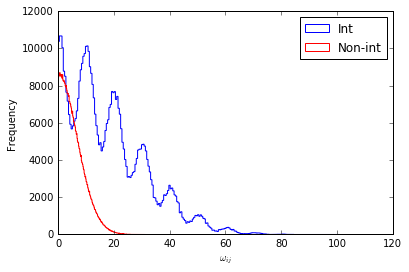

In [157]:
count, bins, ignored = plt.hist(wij_int[index_lower],'auto', color='b',histtype='step', label='Int')
count_nonint, bins_nonint, ignored_nonint = plt.hist(wij_nonint[index_lower],'auto', color='r',histtype='step', label='Non-int')
plt.ylabel(r'Frequency')
plt.xlabel(r'$\omega_{ij}$')
plt.legend()

In [130]:
count[0], count_nonint[0]

(10382.0, 8393.0)

### Color plots of $\omega_{ij}$

In [131]:
L=10
H=Ham_int(L)
E_int,V= H.eigh()
wij_int = np.outer(E_int,np.ones(2**L))-np.outer(np.ones(2**L),E_int)

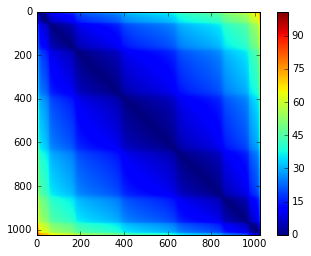

In [132]:
plt.imshow(np.abs(wij_int))
plt.colorbar()

In [115]:
L=10
H=Ham_nonint(L)
E_nonint,V= H.eigh()
wij_nonint = np.outer(E_nonint,np.ones(2**L))-np.outer(np.ones(2**L),E_nonint)

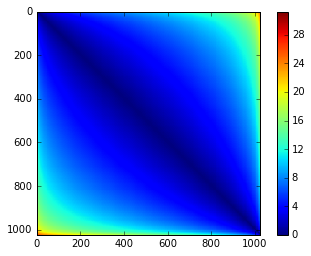

In [116]:
plt.imshow(np.abs(wij_nonint))
plt.colorbar()

### Color plots of $<n|\partial_{\lambda}H|m>$

In [133]:
L=10
H=Ham_int(L)
E_int,V_int= H.eigh()
op_lamb= del_lambda_Ham(L)
num_lamb = np.dot(V_int,np.dot(op_lamb.toarray(),np.conj(V_int)))

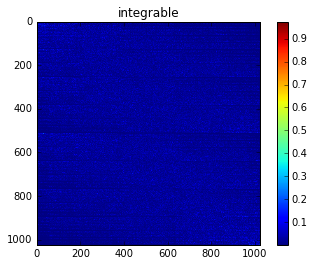

In [118]:
plt.imshow(np.abs(num_lamb))
plt.colorbar()
plt.title("integrable")

In [119]:
L=10
H=Ham_nonint(L)
E_nonint,V_nonint= H.eigh()
op_lamb= del_lambda_Ham(L)
num_lamb_nonint = np.dot(V_nonint,np.dot(op_lamb.toarray(),np.conj(V_nonint)))

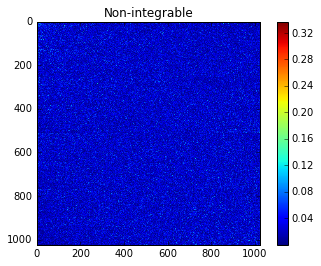

In [120]:
plt.imshow(np.abs(num_lamb_nonint))
plt.colorbar()
plt.title("Non-integrable")

### Histogram of $\partial_{\lambda}H^{ij}$

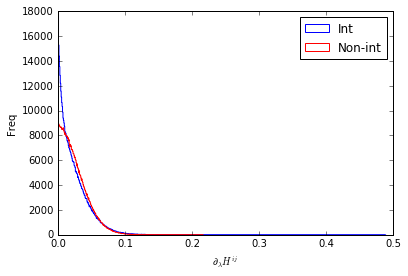

In [134]:
index_lower = np.tril_indices(2**L,-1)
count, bins, ignored = plt.hist(np.abs(num_lamb[index_lower]),'auto', color='b',histtype='step', label='Int')
count_nonint, bins_nonint, ignored_nonint = plt.hist(np.abs(num_lamb_nonint[index_lower]),'auto', color='r',histtype='step', label='Non-int')
plt.ylabel(r'Freq')
plt.xlabel(r'$\partial_{\lambda}H^{ij}$')
plt.legend()

In [135]:
count[0], count_nonint[0]

(17690.0, 8654.0)

In [7]:
#lamda=1e-2
mu=np.sqrt(np.spacing(1))
Ntot=11
length_small_lambda=np.zeros(Ntot-2)
norm_arr_int_small_lambda=np.zeros(Ntot-2)
for i in range(2,Ntot):
    L=i
    length_small_lambda[i-2]=i
    H=Ham_int(L)
    A_lamb=guage_potent_mu(H,L,mu)
    norm_arr_int_small_lambda[i-2]=norm(A_lamb)
    print length_small_lambda[i-2],norm_arr_int_small_lambda[i-2]

2.0 0.706824051566
3.0 35.1024200396
4.0 27797403.5987
5.0 885456.346038
6.0 7864.89977447
7.0 8253.9371548
8.0 7612.59433067
9.0 244214.010207
10.0 3083530.45746


In [4]:
#lamda=1e-1
mu=np.sqrt(np.spacing(1))
Ntot=11
length_not__small_lambda=np.zeros(Ntot-2)
norm_arr_int_not__small_lambda=np.zeros(Ntot-2)
for i in range(2,Ntot):
    L=i
    length_not__small_lambda[i-2]=i
    H=Ham_int(L)
    A_lamb=guage_potent_mu(H,L,mu)
    norm_arr_int_not__small_lambda[i-2]=norm(A_lamb)
    print length_not__small_lambda[i-2],norm_arr_int_not__small_lambda[i-2]

2.0 1.15470174303e-16
3.0 3.55820979701
4.0 3619.28635036
5.0 41551.3272387
6.0 439415.049199
7.0 4648559.42998
8.0 34436609.4618
9.0 8490246.76175
10.0 935382.241232


In [137]:
mu=np.sqrt(np.spacing(1))
Ntot=11
length=np.zeros(Ntot-2)
norm_arr_nonint=np.zeros(Ntot-2)
for i in range(2,Ntot):
    L=i
    length[i-2]=i
    H=Ham_nonint(L)
    A_lamb=guage_potent_mu(H,L,mu)
    norm_arr_nonint[i-2]=norm(A_lamb)
    print length[i-2],norm_arr_nonint[i-2]

2.0 0.43588227558
3.0 2.8584144949
4.0 10.1411533935
5.0 55.6664580393
6.0 862.170199803
7.0 7164.87988267
8.0 16182.1311815
9.0 2129088.20904
10.0 1262392.66815


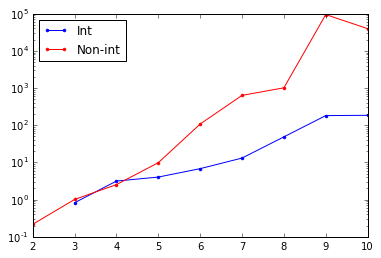

In [163]:
plt.semilogy(length, norm_arr_int, 'b.-', label="Int")
#plt.plot(length,10*np.sqrt(length), 'b-', label="Int")
plt.semilogy(length, norm_arr_nonint/np.sqrt(2**length), 'r.-', label="Non-int")
plt.legend(loc='best')

In [145]:
print np.sqrt(2**length)
print length

[  2.           2.82842712   4.           5.65685425   8.          11.3137085
  16.          22.627417    32.        ]
[  2.   3.   4.   5.   6.   7.   8.   9.  10.]


In [181]:
from scipy.optimize import curve_fit
def func(L, a,alpha):
    return np.log(a)+alpha*np.log(L)
param_bounds=([0,0],[1000.0,1000.0])
popt, pcov = curve_fit(func, np.log(length[6:]), np.log(norm_arr_int[6:]),bounds=param_bounds)
perr = np.sqrt(np.diag(pcov)) #error
a,alpha=popt
a,alpha

(0.0031972678822086652, 13.400336929018097)

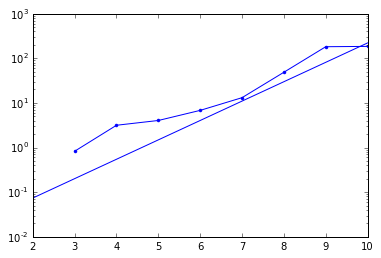

In [187]:
plt.semilogy(length, norm_arr_int, 'b.-', label="Int")
plt.semilogy(length,0.01*np.exp(length), 'b-', label="Int")


### Plotting

In [8]:
int_L=np.loadtxt("Int_Lscaling.dat", skiprows=2, unpack=True)
Nonint_L=np.loadtxt("Non_int_Lscaling.dat", skiprows=2, unpack=True)

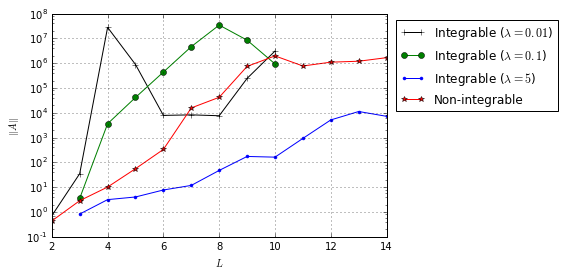

In [24]:
plt.semilogy(length_small_lambda,norm_arr_int_small_lambda,'k+-',label=r"Integrable ($\lambda=0.01$)")
plt.semilogy(length_not__small_lambda[1:],norm_arr_int_not__small_lambda[1:],'go-',label=r"Integrable ($\lambda=0.1$)")
plt.semilogy(int_L[0], int_L[1], 'b.-', label=r"Integrable ($\lambda=5$)")
plt.semilogy(Nonint_L[0], Nonint_L[1], 'r*-', label="Non-integrable")
plt.xlabel(r"$L$")
plt.ylabel(r"$||A||$")
plt.grid()
plt.legend(loc='best')
#plt.ticklabel_format(useOffset=False)

art=[]
lgd=plt.legend(loc=9, bbox_to_anchor=(1.27, 1.0), ncol=1)
art.append(lgd)
#plt.savefig("norm_integ.eps", additional_artists=art,bbox_inches="tight")
#plt.savefig("norm_2.eps")

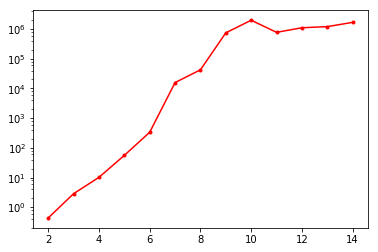

In [19]:
plt.semilogy(Nonint_L[0], Nonint_L[1], 'r.-')

### Curve fitting
At this point of time, it's not working well. Need to check what's wrong here.

In [54]:
from scipy.optimize import curve_fit
def func(L, a, gamma):
    return a*np.e**(L*gamma)#np.log(a)+L*gamma
param_bounds=([0,0],[1000.0,1000.0])
popt, pcov = curve_fit(func, np.log(Nonint_L[0][6:]), np.log(Nonint_L[1][6:]))#,bounds=param_bounds)
perr = np.sqrt(np.diag(pcov)) #error
a,gamma=popt
#a,alpha
print popt, perr

[ 6.08572201  0.33369372] [ 2.28265666  0.15560007]


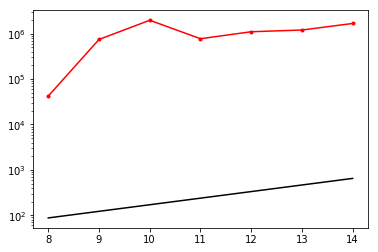

In [53]:
plt.semilogy(length[6:], norm[6:], 'r.-')
plt.semilogy(length[6:],a*np.e**(gamma*length[6:]), 'k-')

### $\mu$ scaling 

In [85]:
L=10
mu=np.logspace(-5,2,20)
Ntot=len(mu)
H=Ham_nonint(L)
norm_arr_nonint=np.zeros(Ntot)
for i in range(Ntot):
    A_lamb=guage_potent_mu(H,L,mu[i])
    norm_arr_nonint[i]=norm(A_lamb)
    print mu[i]**2,norm_arr_nonint[i]**2

1e-10 30604220.5272
5.45559478117e-10 8164418.37935
2.97635144163e-09 2545043.50119
1.62377673919e-08 752146.554605
8.8586679041e-08 257100.706541
4.83293023857e-07 106334.739191
2.63665089873e-06 49207.2136228
1.43844988829e-05 22742.4297903
7.84759970351e-05 10084.6610469
0.000428133239872 4484.00941555
0.00233572146909 1955.15325409
0.012742749857 832.952321624
0.0695192796178 347.461759218
0.379269019073 137.897907488
2.06913808111 48.7288934653
11.2883789168 13.6316207048
61.5848211066 2.44640860244
335.981828628 0.227268910668
1832.98071083 0.0114286820934
10000.0 0.000425596607769


In [80]:
L=8
mu_L8=np.logspace(-5,2.0,20)
Ntot=len(mu_L8)
H=Ham_nonint(L)
norm_arr_nonintL8=np.zeros(Ntot)
for i in range(Ntot):
    A_lamb=guage_potent_mu(H,L,mu_L8[i])
    norm_arr_nonintL8[i]=norm(A_lamb)
    print mu_L8[i]**2,norm_arr_nonintL8[i]**2

1e-10 5098.44349527
5.45559478117e-10 2086.41583352
2.97635144163e-09 1209.64691014
1.62377673919e-08 781.457145287
8.8586679041e-08 434.195257276
4.83293023857e-07 239.01996484
2.63665089873e-06 143.057589795
1.43844988829e-05 94.1901096274
7.84759970351e-05 56.5973776708
0.000428133239872 33.7713460421
0.00233572146909 22.2272449347
0.012742749857 14.8294778176
0.0695192796178 9.73369072594
0.379269019073 6.15660410607
2.06913808111 3.63568436955
11.2883789168 1.87534029496
61.5848211066 0.760997348137
335.981828628 0.220162667497
1832.98071083 0.0477615006275
10000.0 0.00912030193144


In [83]:
L=10
mu=np.logspace(-5,2,20)
Ntot=len(mu)
H=Ham_int(L)
norm_arr_int=np.zeros(Ntot)
for i in range(Ntot):
    A_lamb=guage_potent_mu(H,L,mu[i])
    norm_arr_int[i]=norm(A_lamb)
    print mu[i]**2,norm_arr_int[i]**2

1e-10 183.19902655
5.45559478117e-10 183.188220029
2.97635144163e-09 183.129294071
1.62377673919e-08 182.808709696
8.8586679041e-08 181.08588913
4.83293023857e-07 172.407575139
2.63665089873e-06 139.952886385
1.43844988829e-05 90.4578892493
7.84759970351e-05 64.71583258
0.000428133239872 43.8447444543
0.00233572146909 28.5340108718
0.012742749857 18.9951653033
0.0695192796178 12.3798787409
0.379269019073 7.7148471561
2.06913808111 4.60485298117
11.2883789168 2.68523932887
61.5848211066 1.50878637472
335.981828628 0.693540511549
1832.98071083 0.229528047567
10000.0 0.0541153761931


In [82]:
L=8
mu_L8=np.logspace(-5,2.0,20)
Ntot=len(mu_L8)
H=Ham_int(L)
norm_arr_int8=np.zeros(Ntot)
for i in range(Ntot):
    A_lamb=guage_potent_mu(H,L,mu_L8[i])
    norm_arr_int8[i]=norm(A_lamb)
    print mu_L8[i]**2,norm_arr_int8[i]**2

1e-10 1461.66482942
5.45559478117e-10 1461.65558419
2.97635144163e-09 1461.60514841
1.62377673919e-08 1461.33006496
8.8586679041e-08 1459.83151181
4.83293023857e-07 1451.72069221
2.63665089873e-06 1409.3150185
1.43844988829e-05 1222.15609881
7.84759970351e-05 765.933661226
0.000428133239872 372.48637634
0.00233572146909 209.792510921
0.012742749857 109.840134847
0.0695192796178 48.6103917649
0.379269019073 18.7753755674
2.06913808111 6.3268950966
11.2883789168 1.9874445488
61.5848211066 0.593114244028
335.981828628 0.112557164317
1832.98071083 0.0106361932482
10000.0 0.000532988406343


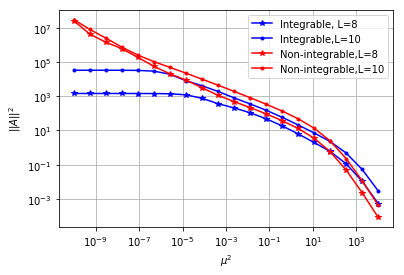

In [168]:
plt.loglog(mu_L8**2,norm_arr_int8**2, 'b*-',label=r"Integrable, L=8 ")
plt.loglog(mu**2,norm_arr_int**2, 'b.-',label=r"Integrable,L=10 ")
plt.loglog(mu_L8**2,norm_arr_nonintL8**2, 'r*-', label="Non-integrable,L=8")
plt.loglog(mu**2,norm_arr_nonint**2, 'r.-', label="Non-integrable,L=10")
plt.xlabel(r"$\mu^2$")
plt.ylabel(r"$||A||^2$")
plt.grid()
plt.legend(loc='best')
#plt.ticklabel_format(useOffset=False)
plt.savefig("norm_mu_scaling.eps")
#art=[]
#lgd=
#plt.legend(loc=9, bbox_to_anchor=(1.27, 1.0), ncol=1)
#art.append(lgd)

In [155]:
from scipy.optimize import curve_fit
def func(x, a, b):
    return np.log(a) + b*x
def gfunc(x, a, b,c):
    #A=np.e**a
    return a*x**(-b)+c


In [162]:
xdata=(mu**2)
ydata=(norm_arr_nonint**2)
popt, pcov = curve_fit(gfunc, xdata, ydata)

In [166]:
print popt
a,b,c=popt
print a,b,c
#print gfunc(mu[0:15]**2, a,b,c)

[  6.44788752e-01   7.67561636e-01   2.78863940e+04]
0.644788752493 0.767561635569 27886.3940392


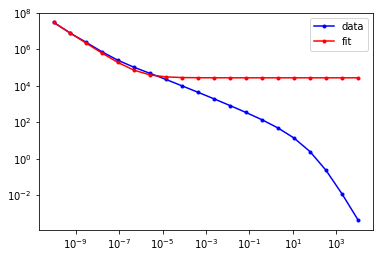

In [165]:
plt.loglog(mu**2, norm_arr_nonint**2, 'b.-', label='data')
plt.loglog(mu**2, gfunc(mu**2, a,b,c), 'r.-', label='fit')
plt.legend()

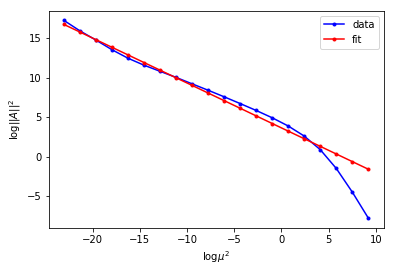

In [148]:
plt.plot(xdata, ydata, 'b.-', label='data')
plt.plot(xdata, func(xdata, *popt), 'r.-', label='fit')
plt.legend()
plt.xlabel(r"$\log \mu^2$")
plt.ylabel(r"$\log ||A||^2$")

In [5]:
mu_L8_int, norm_L8_int=np.loadtxt("L8_int_mu_scaling.dat", skiprows=2, unpack=True)
mu_L8_non_int, norm_L8_non_int=np.loadtxt("L8_non_int_mu_scaling.dat", skiprows=2, unpack=True)
mu_L10_int, norm_L10_int=np.loadtxt("L10_int_mu_scaling.dat", skiprows=2, unpack=True)
mu_L10_non_int, norm_L10_non_int=np.loadtxt("L10_non_int_mu_scaling.dat", skiprows=2, unpack=True)
mu_L12_int, norm_L12_int=np.loadtxt("L12_int_mu_scaling.dat", skiprows=2, unpack=True)
mu_L12_non_int, norm_L12_non_int=np.loadtxt("L12_non_int_mu_scaling.dat", skiprows=2, unpack=True)

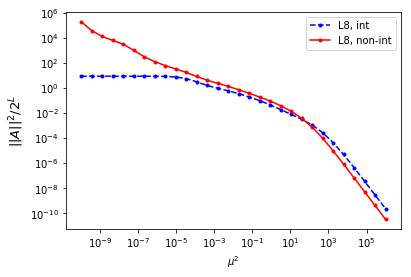

In [39]:
plt.loglog(mu_L8_int, norm_L8_int/2**8, 'b.--', label='L8, int')
#plt.loglog(mu_L10_int, norm_L10_int, 'b+-', label='L10, int')
#plt.loglog(mu_L12_int, norm_L12_int, 'b*-', label='L12, int')
plt.loglog(mu_L8_non_int, norm_L8_non_int/2**8, 'r.-', label='L8, non-int')
#plt.loglog(mu_L10_non_int, norm_L10_non_int, 'r+-', label='L10, non-int')
#plt.loglog(mu_L12_non_int, norm_L12_non_int, 'r*-', label='L12, non-int')
plt.legend()
plt.xlabel(r"$ \mu^2$")
plt.ylabel(r"$||A||^2/2^{L}$", fontsize=13)
plt.savefig("norm_mu_scaling_L8.eps")

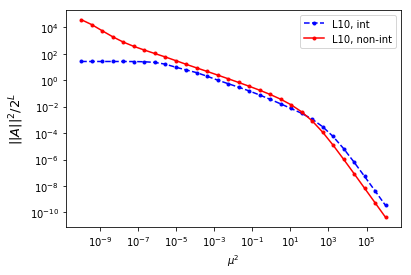

In [40]:
#plt.loglog(mu_L8_int, norm_L8_int, 'b.-', label='L8, int')
plt.loglog(mu_L10_int, norm_L10_int/2**10, 'b.--', label='L10, int')
#plt.loglog(mu_L12_int, norm_L12_int, 'b*-', label='L12, int')
#plt.loglog(mu_L8_non_int, norm_L8_non_int, 'r.-', label='L8, non-int')
plt.loglog(mu_L10_non_int, norm_L10_non_int/2**10, 'r.-', label='L10, non-int')
#plt.loglog(mu_L12_non_int, norm_L12_non_int, 'r*-', label='L12, non-int')
plt.legend()
plt.xlabel(r"$ \mu^2$")
plt.ylabel(r"$||A||^2/2^{L}$", fontsize=13)
plt.savefig("norm_mu_scaling_L10.eps")

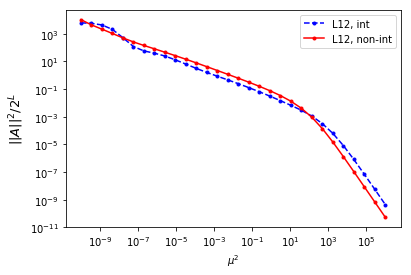

In [41]:
plt.loglog(mu_L12_int, norm_L12_int/2**12, 'b.--', label='L12, int')
plt.loglog(mu_L12_non_int, norm_L12_non_int/2**12, 'r.-', label='L12, non-int')
plt.legend()
plt.xlabel(r"$ \mu^2$")
plt.ylabel(r"$||A||^2/2^{L}$", fontsize=13)
plt.savefig("norm_mu_scaling_L12.eps")

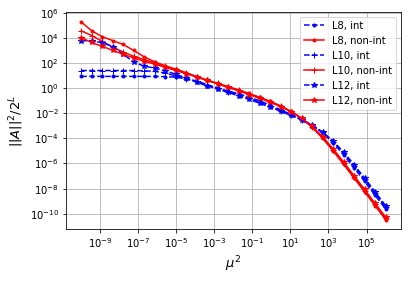

In [37]:
plt.loglog(mu_L8_int, norm_L8_int/2**8, 'b.--', label='L8, int')
plt.loglog(mu_L8_non_int, norm_L8_non_int/2**8, 'r.-', label='L8, non-int')
plt.loglog(mu_L10_int, norm_L10_int/2**10, 'b+--', label='L10, int')
plt.loglog(mu_L10_non_int, norm_L10_non_int/2**10, 'r+-', label='L10, non-int')
plt.loglog(mu_L12_int, norm_L12_int/2**12, 'b*--', label='L12, int')
plt.loglog(mu_L12_non_int, norm_L12_non_int/2**12, 'r*-', label='L12, non-int')
plt.legend()
plt.grid()
plt.xlabel(r"$ \mu^2$", fontsize=13)
plt.ylabel(r"$||A||^2/2^L$" ,fontsize=13)
plt.savefig("norm_mu_scaling_all_L.eps")

In [17]:
2**12

4096